In [1]:
import pandas as pd
import statsmodels.api as sm

# Load data from Excel
file_path = '/Users/aj_wahyudi/Downloads/Data maggot Bogor.xlsx'
df = pd.read_excel(file_path)

# Regression I
X1 = df[['SOrg [kg]', 'FreshMG [kg]']]
y1 = df['Kasgot [kg]']
X1 = sm.add_constant(X1)  # Add a constant term to the independent variables

model1 = sm.OLS(y1, X1).fit()
print("Regression I")
print(model1.summary())
equation1 = f"Equation: Kasgot [kg] = {model1.params['const']:.2f} + {model1.params['SOrg [kg]']:.2f} * SOrg [kg] + {model1.params['FreshMG [kg]']:.2f} * FreshMG [kg]"
print(equation1)

# Regression II
X2 = df[['SOrg [kg]', 'FreshMG [kg]']]
y2 = df['V-freshMG [Rp]']
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
print("\nRegression II")
print(model2.summary())
equation2 = f"Equation: V-freshMG [Rp] = {model2.params['const']:.2f} + {model2.params['SOrg [kg]']:.2f} * SOrg [kg] + {model2.params['FreshMG [kg]']:.2f} * FreshMG [kg]"
print(equation2)

# Regression III
X3 = df[['SOrg [kg]', 'FreshMG [kg]']]
y3 = df['V-kasgot [Rp]']
X3 = sm.add_constant(X3)

model3 = sm.OLS(y3, X3).fit()
print("\nRegression III")
print(model3.summary())
equation3 = f"Equation: V-kasgot [Rp] = {model3.params['const']:.2f} + {model3.params['SOrg [kg]']:.2f} * SOrg [kg] + {model3.params['FreshMG [kg]']:.2f} * FreshMG [kg]"
print(equation3)


Regression I
                            OLS Regression Results                            
Dep. Variable:            Kasgot [kg]   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1505.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.82e-33
Time:                        16:53:00   Log-Likelihood:                -289.48
No. Observations:                  36   AIC:                             585.0
Df Residuals:                      33   BIC:                             589.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -146.4591    191.225 

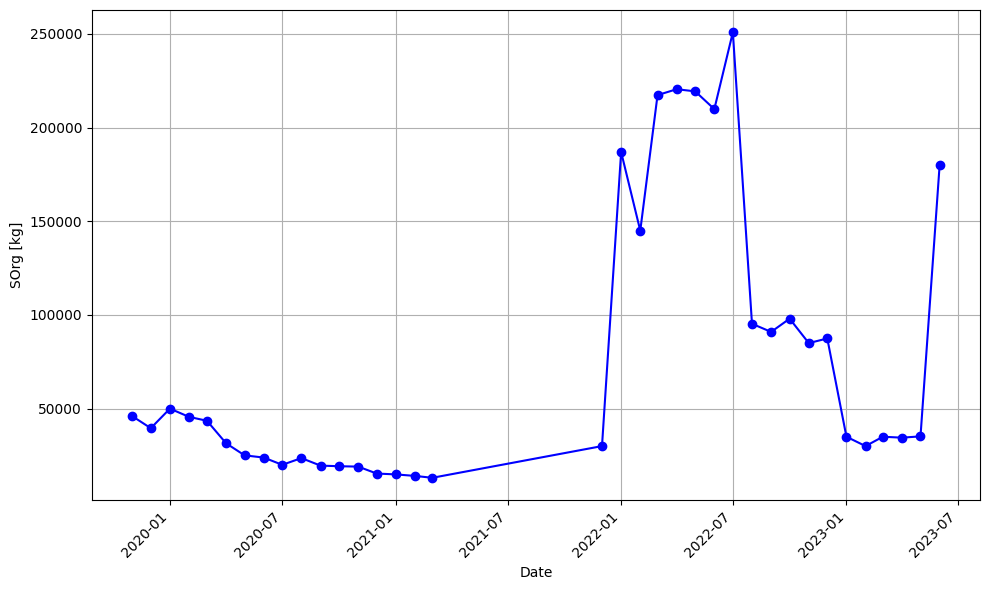

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel
file_path = '/Users/aj_wahyudi/Downloads/Data maggot Bogor.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SOrg [kg]'], marker='o', linestyle='-', color='b')

# Formatting the plot
#plt.title('Time-Series Plot of SOrg [kg]')
plt.xlabel('Date')
plt.ylabel('SOrg [kg]')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Save the plot as a PDF file in the same folder as the dataset
pdf_file_path = '/Users/aj_wahyudi/Downloads/Sampah Organik Time_Series_Plot.pdf'
plt.savefig(pdf_file_path)

# Display the plot
plt.tight_layout()
plt.show()


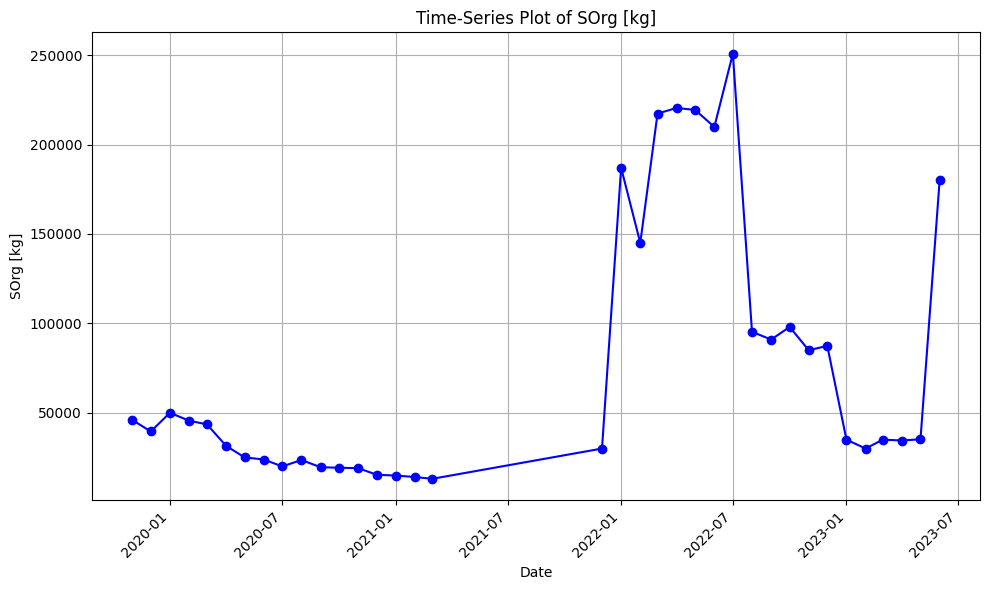

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08145D+00    |proj g|=  1.77095D-01

At iterate    5    f=  7.98286D+00    |proj g|=  1.25933D-02

At iterate   10    f=  7.97701D+00    |proj g|=  1.96222D-03

At iterate   15    f=  7.97632D+00    |proj g|=  3.99446D-04

At iterate   20    f=  7.97622D+00    |proj g|=  1.55461D-03

At iterate   25    f=  7.97619D+00    |proj g|=  1.17532D-04

At iterate   30    f=  7.97618D+00    |proj g|=  3.58991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


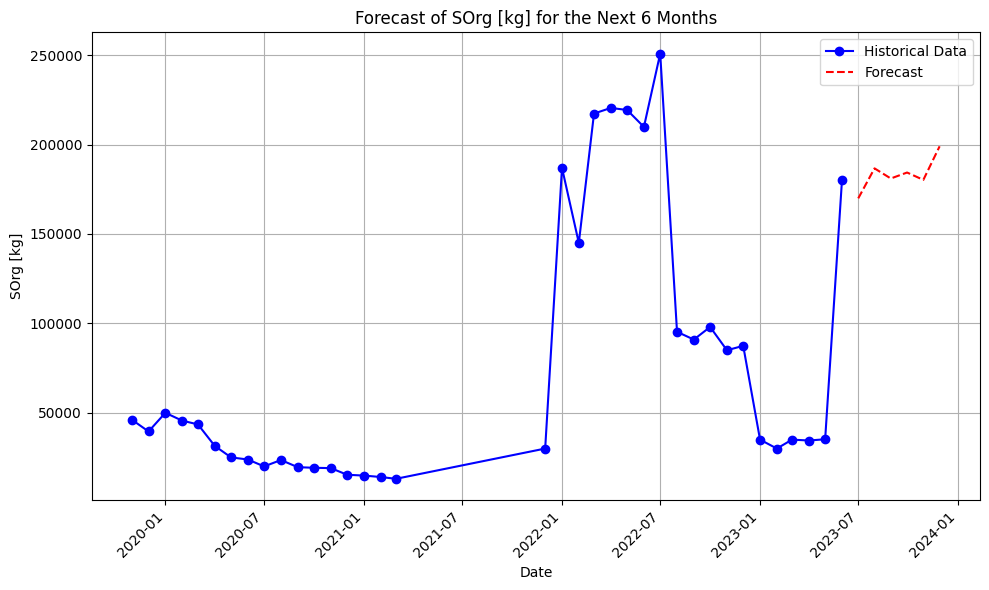

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Load data from Excel
file_path = '/Users/aj_wahyudi/Downloads/Data maggot Bogor.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a time-series plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SOrg [kg]'], marker='o', linestyle='-', color='b')
plt.title('Time-Series Plot of SOrg [kg]')
plt.xlabel('Date')
plt.ylabel('SOrg [kg]')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Forecasting using SARIMAX
# Assuming your data has monthly frequency
frequency = 'M'
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Fit SARIMAX model
model = SARIMAX(df['SOrg [kg]'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
results = model.fit()

# Forecasting 6 months ahead
forecast_steps = 6
forecast_dates = [df.index[-1] + timedelta(days=(i+1) * 30) for i in range(forecast_steps)]
forecast = results.get_forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['SOrg [kg]'], label='Historical Data', marker='o', linestyle='-', color='b')
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', linestyle='--', color='r')
plt.title('Forecast of SOrg [kg] for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('SOrg [kg]')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Plot autocorrelation and partial autocorrelation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(df['SOrg [kg]'], ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['SOrg [kg]'], ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Save ACF and PACF plots in one PDF file
combined_pdf_path = '/Users/aj_wahyudi/Downloads/ACF&PACF 01_Plot.pdf'
with PdfPages(combined_pdf_path) as pdf:
    pdf.savefig(fig)
    plt.close()

# If you want to display the saved PDF file, you can use the following line:
plt.show()




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# First-order differencing
df['diff_SOrg'] = df['SOrg [kg]'].diff()

# Plot differencing
plt.plot(df['diff_SOrg'])
plt.title('First-order Differencing of SOrg [kg]')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True)

# Save differencing plot as PDF
diff_pdf_path = '/Users/aj_wahyudi/Downloads/Differencing_Plot.pdf'
plt.savefig(diff_pdf_path)
plt.close()

# Plot autocorrelation and partial autocorrelation of the differenced series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(df['diff_SOrg'].dropna(), ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) of Differenced Series')

# PACF plot
plot_pacf(df['diff_SOrg'].dropna(), ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) of Differenced Series')

# Save ACF and PACF plots as PDF
acf_pacf_pdf_path = '/Users/aj_wahyudi/Downloads/ACF_PACF 02_Plot.pdf'
plt.savefig(acf_pacf_pdf_path)
plt.close()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


In [10]:
import itertools

# Define the parameter grid
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Grid search
best_aic = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(df['SOrg [kg]'], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except Exception as e:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29884D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.299D+01
  F =   12.988422437243834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      8      1     0     0   2.128D-06   8.641D+00
  F =   8.6407108098931875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.71190D+00    |proj g|=  1.45610D-01

At iterate    5    f=  8.63541D+00    |proj g|=  1.36144D-01

At iterate   10    f=  8.60116D+00    |proj g|=  3.26857D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/py


At iterate    5    f=  1.27430D+01    |proj g|=  3.54534D-03

At iterate   10    f=  1.27417D+01    |proj g|=  1.20598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   5.234D-06   1.274D+01
  F =   12.741670194765923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65712D+00    |proj g|=  5.82505D-03

At iterate    5    f=  8.62008D+00    |proj g|=  1.04375D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba


At iterate   10    f=  8.58753D+00    |proj g|=  1.97109D-03

At iterate   15    f=  8.58649D+00    |proj g|=  1.15921D-02

At iterate   20    f=  8.58603D+00    |proj g|=  3.05498D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     31      1     0     0   3.055D-06   8.586D+00
  F =   8.5860333277945742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18695D+01    |proj g|=  5.80868D-07

       

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba


At iterate    5    f=  1.18598D+01    |proj g|=  1.73629D-02

At iterate   10    f=  1.18584D+01    |proj g|=  2.94443D-03

At iterate   15    f=  1.18583D+01    |proj g|=  1.94368D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   3.133D-06   1.186D+01
  F =   11.858304600787241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11367D+00    |proj g|=  3.21005D-01

At iter

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  7.95785D+00    |proj g|=  1.47752D-02

At iterate   10    f=  7.95046D+00    |proj g|=  2.85517D-03

At iterate   15    f=  7.94949D+00    |proj g|=  1.10850D-03

At iterate   20    f=  7.94936D+00    |proj g|=  3.44045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   3.440D-06   7.949D+00
  F =   7.9493638178157981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09051D+00    |proj g|=  1.81605D-01

At iterate    5    f=  8.02516D+00    |proj g|=  7.17630D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      8      1     0     0   3.362D-06   8.025D+00
  F =   8.0251552979388165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f=  7.98329D+00    |proj g|=  1.85986D-04

At iterate   15    f=  7.98285D+00    |proj g|=  3.49336D-03

At iterate   20    f=  7.98277D+00    |proj g|=  1.04302D-04

At iterate   25    f=  7.98276D+00    |proj g|=  5.61640D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     53      1     0     0   2.281D-04   7.968D+00
  F =   7.9679271968774055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starti


At iterate   25    f=  7.98153D+00    |proj g|=  4.28829D-05

At iterate   30    f=  7.98152D+00    |proj g|=  9.59100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     46      1     0     0   9.590D-05   7.982D+00
  F =   7.9815204983971864     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22128D+01    |proj g|=  8.32403D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(date

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40449D+00    |proj g|=  6.85874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   1.288D-06   8.404D+00
  F =   8.4044879088971154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40449D+00    |proj g|=  2.29712D-01

At iterat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/py


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   2.678D-06   1.221D+01
  F =   12.207148536097241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29523D+00    |proj g|=  6.49052D-03

At iterate    5    f=  8.29448D+00    |proj g|=  1.39746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba


At iterate   10    f=  1.22013D+01    |proj g|=  1.48249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   2.344D-06   1.220D+01
  F =   12.201297348320022     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40818D+00    |proj g|=  2.22261D-03

At iterate    5    f=  8.40817D+00    |proj g|=  5.74039D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba


At iterate   10    f=  1.22010D+01    |proj g|=  2.34562D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     13      1     0     0   2.365D-06   1.220D+01
  F =   12.201040742002020     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22082D+01    |proj g|=  9.73024D-02

At iterate    5    f=  1.22015D+01    |proj g|=  8.87912D-03

At iterate   10    f=  1.22009D+01    |proj g|=  1.49654D-03

At iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba


At iterate    5    f=  8.31408D+00    |proj g|=  4.77851D-04

At iterate   10    f=  8.31406D+00    |proj g|=  1.29978D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   3.993D-06   8.314D+00
  F =   8.3140625206308414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40818D+00    |proj g|=  1.99726D-01

At iterate    5    f=  8.31673D+00    |proj g|=  1.67435D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18533D+01    |proj g|=  1.61750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.083D-06   1.185D+01
  F =   11.853290423175729     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  1.18420D+01    |proj g|=  1.37172D-03

At iterate   10    f=  1.18419D+01    |proj g|=  1.03607D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   1.261D-06   1.184D+01
  F =   11.841858501424603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08297D+00    |proj g|=  2.09050D-01

At iterate    5    f=  7.96287D+00    |proj g|=  3.62179D-03

At iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08297D+00    |proj g|=  2.09052D-01

At iterate    5    f=  7.96540D+00    |proj g|=  1.39246D-02

At iterate   10    f=  7.95853D+00    |proj g|=  2.07897D-03

At iterate   15    f=  7.95761D+00    |proj g|=  2.11585D-03

At iterate   20    f=  7.95748D+00    |proj g|=  3.12194D-04

At iterate   25    f=  7.95746D+00    |proj g|=  2.60790D-05

At iterate   30    f=  7.95746D+00    |proj g|=  7.38246D-04

At iterate   35    f=  7.95746D+00    |proj g|=  1.35885D-04
  ys=-9.838E-05  -gs= 4.655E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18541D+01    |proj g|=  1.11379D-01

At iterate    5    f=  1.18445D+01    |proj g|=  6.09670D-03

At iterate   10    f=  1.18443D+01    |proj g|=  2.19423D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   2.194D-05   1.184D+01
  F =   11.844339910096892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/ba

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18510D+01    |proj g|=  8.29729D-02

At iterate    5    f=  1.18443D+01    |proj g|=  4.76120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   5.148D-06   1.184D+01
  F =   11.844167881077961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starti


At iterate   20    f=  7.97622D+00    |proj g|=  1.55461D-03

At iterate   25    f=  7.97619D+00    |proj g|=  1.17532D-04

At iterate   30    f=  7.97618D+00    |proj g|=  3.58991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   5.490D-04   7.976D+00
  F =   7.9761828011762930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best AIC: 574.4168407812939
Best Parameters: ((0, 1, 0), (1, 1, 0, 12))


In [11]:
final_model = SARIMAX(df['SOrg [kg]'], order=best_params[0], seasonal_order=best_params[1])
final_results = final_model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11367D+00    |proj g|=  3.21005D-01

At iterate    5    f=  7.92800D+00    |proj g|=  4.77300D-03

At iterate   10    f=  7.92315D+00    |proj g|=  2.38340D-04

At iterate   15    f=  7.92249D+00    |proj g|=  1.19209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     17      1     0     0   6.487D-06   7.922D+00
  F =   7.9224561219624157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11367D+00    |proj g|=  3.21005D-01

At iterate    5    f=  7.92800D+00    |proj g|=  4.77300D-03

At iterate   10    f=  7.92315D+00    |proj g|=  2.38340D-04

At iterate   15    f=  7.92249D+00    |proj g|=  1.19209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     17      1     0     0   6.487D-06   7.922D+00
  F =   7.9224561219624157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Forecast

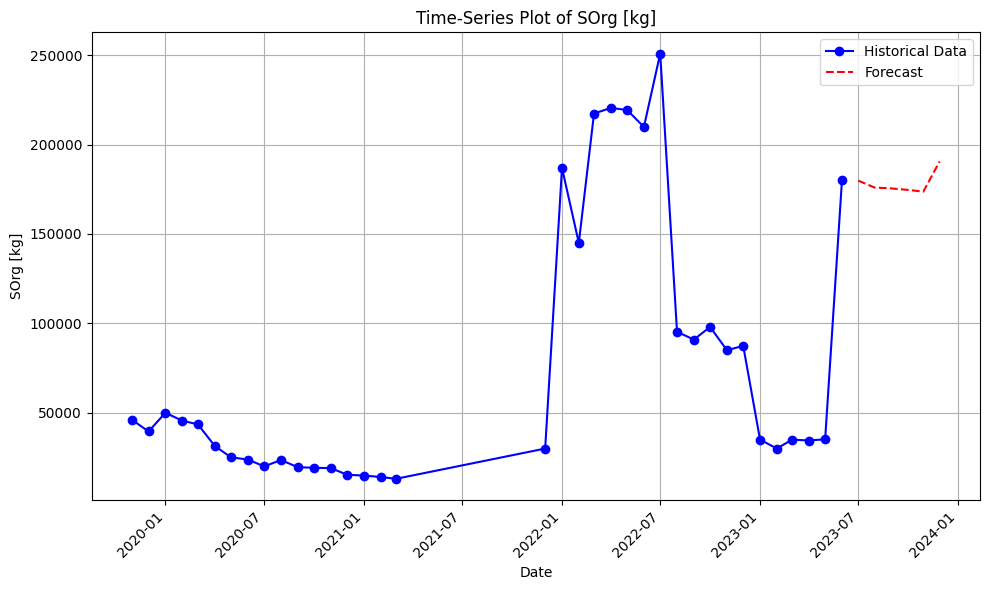

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Load data from Excel
file_path = '/Users/aj_wahyudi/Downloads/Data maggot Bogor.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a time-series plot of historical data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SOrg [kg]'], label='Historical Data', marker='o', linestyle='-', color='b')
plt.title('Time-Series Plot of SOrg [kg]')
plt.xlabel('Date')
plt.ylabel('SOrg [kg]')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Fit SARIMAX model
model = SARIMAX(df['SOrg [kg]'], order=(0, 1, 0), seasonal_order=(1, 1, 0, 12))  # Adjust order as needed
results = model.fit()
# best parameters according previous test (0, 1, 0), (1, 1, 0, 12)

# Forecasting 6 months ahead
forecast_steps = 6
forecast_dates = [df['Date'].iloc[-1] + timedelta(days=(i+1) * 30) for i in range(forecast_steps)]
forecast = results.get_forecast(steps=forecast_steps)

# Plotting the forecast
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', linestyle='--', color='r')

# Formatting the plot
plt.legend()
plt.tight_layout()

# Print the forecast data
print("Forecasted Data:")
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted SOrg [kg]': forecast.predicted_mean})
print(forecast_df)

# Save the plot to a PDF file
pdf_file_path = '/Users/aj_wahyudi/Downloads/SOrg_forecast_plot 6 month.pdf'
plt.savefig(pdf_file_path)
plt.show()

# Close the plot to avoid displaying it again
plt.close()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11367D+00    |proj g|=  3.21005D-01

At iterate    5    f=  7.92800D+00    |proj g|=  4.77300D-03

At iterate   10    f=  7.92315D+00    |proj g|=  2.38340D-04

At iterate   15    f=  7.92249D+00    |proj g|=  1.19209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     17      1     0     0   6.487D-06   7.922D+00
  F =   7.9224561219624157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Forecast

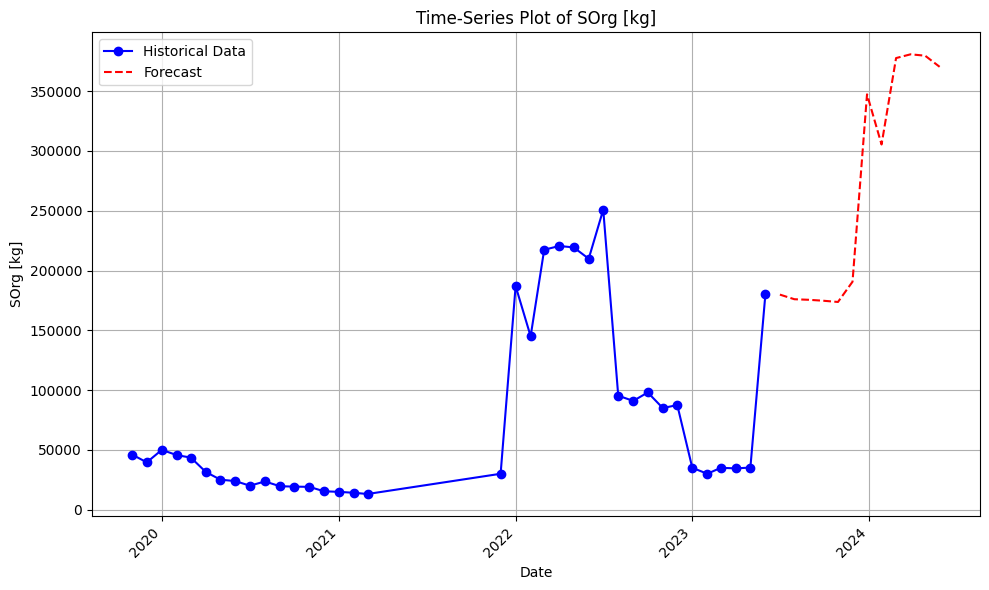

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Load data from Excel
file_path = '/Users/aj_wahyudi/Downloads/Data maggot Bogor.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a time-series plot of historical data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SOrg [kg]'], label='Historical Data', marker='o', linestyle='-', color='b')
plt.title('Time-Series Plot of SOrg [kg]')
plt.xlabel('Date')
plt.ylabel('SOrg [kg]')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Fit SARIMAX model
model = SARIMAX(df['SOrg [kg]'], order=(0, 1, 0), seasonal_order=(1, 1, 0, 12))  # Adjust order as needed
results = model.fit()
# best parameters according previous test (0, 1, 0), (1, 1, 0, 12)

# Forecasting 12 months ahead
forecast_steps = 12
forecast_dates = [df['Date'].iloc[-1] + timedelta(days=(i+1) * 30) for i in range(forecast_steps)]
forecast = results.get_forecast(steps=forecast_steps)

# Plotting the forecast
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', linestyle='--', color='r')

# Formatting the plot
plt.legend()
plt.tight_layout()

# Print the forecast data
print("Forecasted Data:")
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted SOrg [kg]': forecast.predicted_mean})
print(forecast_df)

# Save the plot to a PDF file
pdf_file_path = '/Users/aj_wahyudi/Downloads/SOrg_forecast_plot 12 month.pdf'
plt.savefig(pdf_file_path)
plt.show()

# Close the plot to avoid displaying it again
plt.close()
